In [63]:
import numpy as np

In [64]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# y = 3X + 4

In [65]:
import matplotlib.pyplot as plt

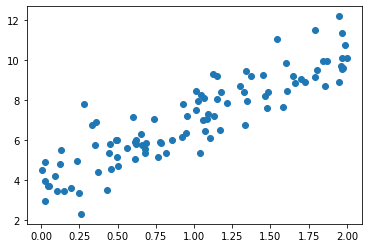

In [66]:
plt.scatter(X, y)

In [67]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [68]:
theta_best

array([[3.85389348],
       [3.24993372]])

In [69]:
X_new = np.array([[0], [2]]) # X 계수
X_new_b = np.c_[np.ones((2, 1)), X_new] # 상수항 계수 1
X_new_b

array([[1., 0.],
       [1., 2.]])

In [70]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85389348],
       [10.35376093]])

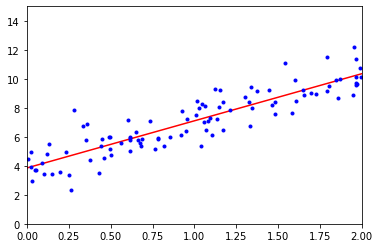

In [71]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [74]:
lin_reg.intercept_ # 상수항

array([3.85389348])

In [75]:
lin_reg.coef_ # 계수

array([[3.24993372]])

In [76]:
lin_reg.predict(X_new)

array([[ 3.85389348],
       [10.35376093]])

In [77]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.85389348],
       [3.24993372]])

In [78]:
np.linalg.pinv(X_b).dot(y)

array([[3.85389348],
       [3.24993372]])

- 정규방정식은 features 수에 따라 O(n^2) 정도 증가함 / 데이터 수 O(n)
- features이 너무 많으면 비용이 너무 커짐

In [79]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [80]:
theta

array([[3.85389348],
       [3.24993372]])

- 전체를 계산한 후에 GD를 갱신하면 너무 크면 메모리가 많이 들고, 하나씩 GD를 갱신하면 너무 오래 걸림
- SGD는 확률적으로 샘플 하나를 정해서 그에 대한 GD를 갱신

In [81]:
np.random.randint(10)

8

In [82]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)
print(theta)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # SGD처럼 랜덤하게 하나만 뽑음
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # 점점 lr이 줄어듦
        theta = theta - eta * gradients

[[0.95417238]
 [0.84697585]]


In [83]:
theta

array([[3.84105996],
       [3.26103303]])

In [84]:
from sklearn.linear_model import SGDRegressor

In [85]:
y.shape

(100, 1)

In [86]:
y.ravel().shape

(100,)

In [87]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [88]:
sgd_reg.intercept_

array([3.88588954])

In [89]:
sgd_reg.coef_

array([3.2819392])

In [129]:
np.random.seed(42)

In [130]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

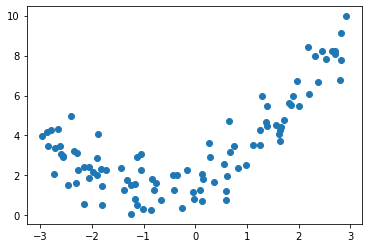

In [131]:
plt.scatter(X, y)

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [108]:
X_poly[0] # [x, x^2]

array([-0.75275929,  0.56664654])

In [109]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_

array([1.78134581])

In [110]:
lin_reg.coef_

array([[0.93366893, 0.56456263]])

$$y = 0.5x^2+1.0x+2.0+error$$
$$y = 0.56x^2+1.08x+1.80 $$

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [120]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation set')
    plt.legend()

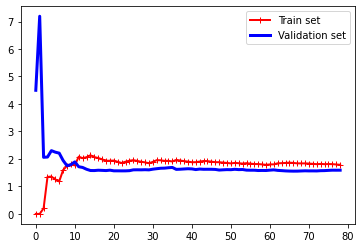

In [132]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [122]:
from sklearn.pipeline import Pipeline

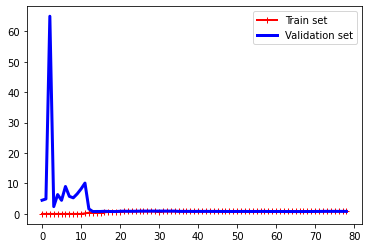

In [133]:
polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)

In [124]:
from sklearn.linear_model import Ridge

In [134]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [135]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.80078479])

In [137]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

In [142]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [144]:
poly_scaler = Pipeline([
            ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
            ('std_scaler', StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [146]:
from sklearn import datasets

In [147]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [149]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int8)

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

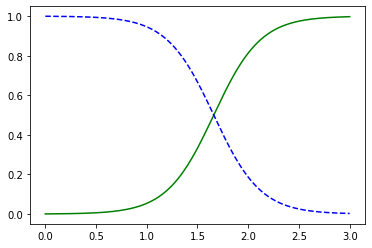

In [153]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')

In [154]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [156]:
softmax_reg.predict([[5, 2]])

array([2])

In [157]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])